In [102]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import math
import scipy.special as sp
import scipy.integrate as integ

claims = np.loadtxt('clms.txt')

# Problem Set 2

(a) First histogram with 1000 bins

<IPython.core.display.Javascript object>


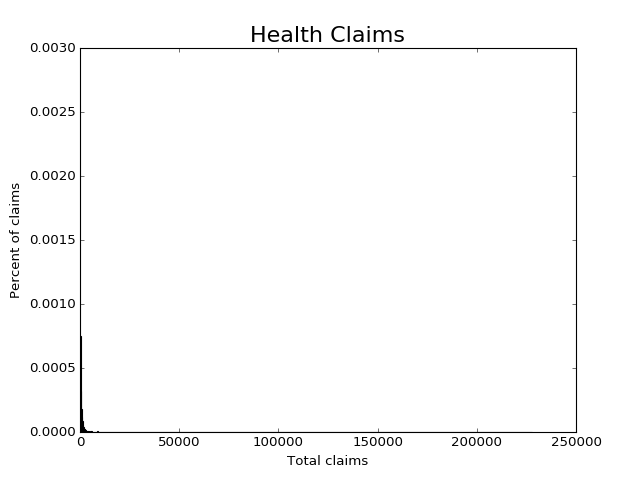

In [103]:
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

plt.hist(claims, 1000, normed=True)
plt.title('Health Claims', fontsize=20)
plt.xlabel('Total claims')
plt.ylabel('Percent of claims')
#plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

(b) Second histogram: bins=100, using x<800

<IPython.core.display.Javascript object>


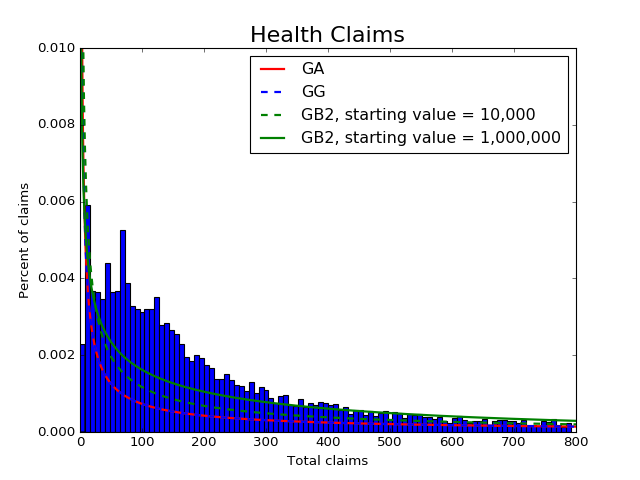

In [104]:
binBoundaries = np.arange(0,800,8)
#print(binBoundaries[:10])
%matplotlib notebook 

plt.hist(claims, bins=binBoundaries, range=(0,800), normed=True)
plt.xlim([0, 800])  # This gives the xmin and xmax to be plotted"
plt.ylim([0, 0.01])
plt.title('Health Claims', fontsize=20)
plt.xlabel('Total claims')
plt.ylabel('Percent of claims')

The second histogram shows a lot more information about the shape of the data distribution. The first histogram (including all data points) seems very uninformative except that it shows the existence of a very long and thin right tail. 

(b) Fit GA distribution with 2 parameters

In [105]:
# Define function that generates values of a normal pdf
def GA_pdf(x, aa, bb):

    pdf_vals = sts.gamma.pdf(x,aa, loc=0, scale=bb)
            
    return pdf_vals

In [127]:
## Log likelihood function
def log_lik(params, *args):
    x, dist = args
    if dist == 'GA':
        aa, bb = params
        pdf_vals = GA_pdf(x, aa,bb)
    if dist == 'GG':
        aa,bb,mm = params
        pdf_vals = GG_pdf(x,aa,bb,mm)
    if dist == 'GB2':
        aa,bb,pp,qq = params
        pdf_vals = GB2_pdf(x,(aa,bb,pp,qq))

    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [107]:
import scipy.optimize as opt

b_init = np.var(claims)/np.mean(claims)  
a_init = np.mean(claims)/b_init  
params_init = np.array([a_init, b_init])

bnds = ((0, None), (0, None))
ga_args = (claims, 'GA')
resultsGA = opt.minimize(log_lik, params_init, args=ga_args, bounds = bnds)
a_GA_MLE, b_GA_MLE = resultsGA.x
print('a_GA_MLE=', a_GA_MLE, 'b_GA_MLE=', b_GA_MLE, 'Log Likelihood=', -resultsGA.fun)

a_GA_MLE= 0.221755308612 b_GA_MLE= 21911.0646993 Log Likelihood= -82076.4516057


In [108]:
pts = np.linspace(0, 800, 1000)

plt.plot(pts,GA_pdf(pts, a_GA_MLE, b_GA_MLE),
         linewidth=2, color='r', label='GA')
plt.legend(loc='upper right')

(c) Fit GG distribution with 3 parameters 

In [109]:
def GG_pdf(x, aa, bb, mm):
    pdf_vals = sts.gengamma.pdf(x,aa, mm, scale=bb)
            
    return pdf_vals

In [110]:
b_init = b_GA_MLE
a_init = a_GA_MLE
m_init = 1
params_init = np.array([a_init, b_init, m_init])

bnds = ((0, None), (0, None), (0,None))
gg_args = (claims, 'GG')
resultsGG = opt.minimize(log_lik, params_init, args=gg_args, bounds = bnds)
a_GG_MLE, b_GG_MLE, m_GG_MLE = resultsGG.x
print('a_GG_MLE=', a_GG_MLE, '\nb_GG_MLE=', b_GG_MLE, '\nm_GG_MLE=', m_GG_MLE, '\nLog Likelihood=', -resultsGG.fun)

a_GG_MLE= 0.222276545736 
b_GG_MLE= 21911.0644712 
m_GG_MLE= 0.997648790962 
Log Likelihood= -82076.4464719


In [111]:
plt.plot(pts,GG_pdf(pts, a_GG_MLE, b_GG_MLE, m_GG_MLE),
         linewidth=2, color='b', ls='dashed', label='GG')
plt.legend(loc='upper right')

(d) Fit GB2 distribution

In [128]:
def GB2_pdf(x, params):
    aa,bb,pp,qq = params
    pdf_vals = (np.abs(aa)*(x**(aa*pp -1)))/((bb**(aa*pp))*sp.beta(pp,qq)*((1+((x/bb)**aa))**(pp+qq)))
            
    return pdf_vals

In [113]:

a_init = m_GG_MLE
p_init = a_GG_MLE
q_init = 10000
b_init = (q_init**(1/m_GG_MLE))*b_GG_MLE
params_init = np.array([a_init, b_init, p_init, q_init])

bnds = ((0, None), (0, None), (0,None), (0, None))
gb2_args = (claims, 'GB2')
resultsGB = opt.minimize(log_lik, params_init, args=gb2_args, bounds = bnds)
a_GB2_MLE, b_GB2_MLE, p_GB2_MLE, q_GB2_MLE = resultsGB.x
print('a_GB2_MLE=', a_GB2_MLE, '\nb_GB2_MLE=', b_GB2_MLE, '\np_GB2_MLE=', p_GB2_MLE, '\nq_GB2_MLE=', q_GB2_MLE,
     '\n Log Likelihood=', -resultsGB.fun)

a_GB2_MLE= 0.813384569025 
b_GB2_MLE= 223918758.591 
p_GB2_MLE= 0.36124943524 
q_GB2_MLE= 9999.99941482 
 Log Likelihood= -78434.423906


C:\Users\Sophie\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app
C:\Users\Sophie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log
C:\Users\Sophie\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


In [114]:
plt.plot(pts,GB2_pdf(pts, a_GB2_MLE, b_GB2_MLE, p_GB2_MLE, q_GB2_MLE),
         linewidth=2, color='g', ls = 'dashed', label='GB2, starting value = 10,000')
plt.legend(loc='upper right')

C:\Users\Sophie\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


In [115]:

a_init = m_GG_MLE
p_init = a_GG_MLE
q_init = 1000000
b_init = (q_init**(1/m_GG_MLE))*b_GG_MLE
params_init = np.array([a_init, b_init, p_init, q_init])

bnds = ((0, None), (0, None), (0,None), (0, None))
gb2_args = (claims, 'GB2')
results = opt.minimize(log_lik, params_init, args=gb2_args, bounds = bnds)
a_GB2_MLE, b_GB2_MLE, p_GB2_MLE, q_GB2_MLE = results.x
print('a_GB2_MLE=', a_GB2_MLE, '\nb_GB2_MLE=', b_GB2_MLE, '\np_GB2_MLE=', p_GB2_MLE, '\nq_GB2_MLE=', q_GB2_MLE,
     '\n Log Likelihood=', -results.fun)

a_GB2_MLE= 0.801351952106 
b_GB2_MLE= 22636223756.3 
p_GB2_MLE= 0.736004942255 
q_GB2_MLE= 999999.709879 
 Log Likelihood= -76859.99321


C:\Users\Sophie\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app
C:\Users\Sophie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log
C:\Users\Sophie\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


In [116]:
plt.plot(pts,GB2_pdf(pts, a_GB2_MLE, b_GB2_MLE, p_GB2_MLE, q_GB2_MLE),
         linewidth=2, color='g', label='GB2, starting value = 1,000,000')
plt.legend(loc='upper right')

C:\Users\Sophie\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


As the graph shows, starting value seems to matter very much; estimation with $q_{0}=1,000,000$ seems to perform much better than the one with $q_{0}=100,000$ according to the log likelihood values. Overall, GB2 distribution fits the data better than the other two former distributions (GA and GG), according to both the graphs and the log likelihoods. 

(e) Log likelihood ratio test

In [117]:
test_GA = 2*((-resultsGA.fun)-(-resultsGB.fun))
test_GG = 2*((-resultsGG.fun)-(-resultsGB.fun))

print('LR statistic for GA vs. GB2 = ',test_GA)
print('LR statistic for GG vs. GB2 = ',test_GG)
print(sts.chi2.cdf(test_GA,4))
print(sts.chi2.cdf(test_GG,4))

LR statistic for GA vs. GB2 =  -7284.05539932
LR statistic for GG vs. GB2 =  -7284.04513184
0.0
0.0


As the test statistics show, $\theta_{GB2}$ are statistically different from $\theta_{GA}$ or $\theta_{GG}$.

(f) How likely am I to have a monthly health care claim of more than $1,000?

In [123]:
print('GA case: ', 1 - sts.gamma.cdf(1000, a_GA_MLE, loc=0, scale = b_GA_MLE))

GA case:  0.451959722389


In [133]:
print('GB2 case: ', 1 - integ.quad(GB2_pdf, a=0, b=1000, args=(resultsGB.x))[0])

GB2 case:  0.24899327940900828
